In [1]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

import torch
from torch import nn
import torchvision
from torchvision.datasets import MNIST

DATA_PATH = './data'

In [2]:
# transform the images
transform = torchvision.transforms.Compose(
    [
        torchvision.transforms.ToTensor(),
        torchvision.transforms.Normalize((0.5,), (0.5,))
    ])

# get the dataset
train = MNIST(DATA_PATH, download=True, train=True, transform=transform)
test = MNIST(DATA_PATH, download=True, train=False, transform=transform)

train_loader = torch.utils.data.DataLoader(train, batch_size=64, shuffle=True)
test_loader = torch.utils.data.DataLoader(test, batch_size=64, shuffle=True)

/Users/stuart/projects/deep-learning-v2-pytorch/venv/lib/python3.9/site-packages/torchvision/datasets/mnist.py:498: UserWarning: The given NumPy array is not writeable, and PyTorch does not support non-writeable tensors. This means you can write to the underlying (supposedly non-writeable) NumPy array using the tensor. You may want to copy the array to protect its data or make it writeable before converting it to a tensor. This type of warning will be suppressed for the rest of this program. (Triggered internally at  ../torch/csrc/utils/tensor_numpy.cpp:180.)
  return torch.from_numpy(parsed.astype(m[2], copy=False)).view(*s)


In [3]:
data_iter = iter(train_loader)
images, labels = data_iter.next()

print(images.shape)
print(labels.shape)

torch.Size([64, 1, 28, 28])
torch.Size([64])


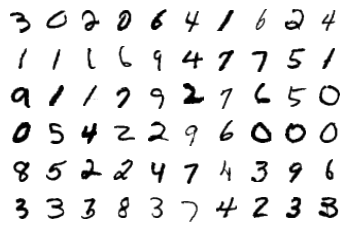

In [4]:
figure = plt.figure()
num_of_images = 60
for index in range(1, num_of_images + 1):
    plt.subplot(6, 10, index)
    plt.axis('off')
    plt.imshow(images[index].numpy().squeeze(), cmap='gray_r')

# Network Part

In [5]:
# define the network
input_size = 784
hidden_sizes = [128, 64]
output_size = 10

model = nn.Sequential(nn.Linear(input_size, hidden_sizes[0]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[0], hidden_sizes[1]),
                      nn.ReLU(),
                      nn.Linear(hidden_sizes[1], output_size),
                      nn.Softmax())

print(model)

Sequential(
  (0): Linear(in_features=784, out_features=128, bias=True)
  (1): ReLU()
  (2): Linear(in_features=128, out_features=64, bias=True)
  (3): ReLU()
  (4): Linear(in_features=64, out_features=10, bias=True)
  (5): Softmax(dim=None)
)


In [6]:
opt = torch.optim.SGD(model.parameters(), lr=0.003, momentum=0.9)

loss_fn = nn.CrossEntropyLoss()

epochs=15

for e in range(epochs):
    total_loss = 0
    for images, labels, in train_loader:
        images = images.view(images.shape[0], -1) # flatten image
        
        output = model(images)
        loss = loss_fn(output, labels)
        
        opt.zero_grad()
        loss.backward()
        
        opt.step() # update the weights
        total_loss += loss.item()
    else:
        print("Epoch {} - Training loss: {}".format(e, total_loss/len(train_loader)))

/Users/stuart/projects/deep-learning-v2-pytorch/venv/lib/python3.9/site-packages/torch/nn/modules/container.py:139: UserWarning: Implicit dimension choice for softmax has been deprecated. Change the call to include dim=X as an argument.
  input = module(input)


Epoch 0 - Training loss: 2.133506038295689
Epoch 1 - Training loss: 1.708591251612218
Epoch 2 - Training loss: 1.644610524940084
Epoch 3 - Training loss: 1.6313351439768826
Epoch 4 - Training loss: 1.624475454089484
Epoch 5 - Training loss: 1.620257824722892
Epoch 6 - Training loss: 1.616187444373743
Epoch 7 - Training loss: 1.6134642422326337
Epoch 8 - Training loss: 1.6108389226104152
Epoch 9 - Training loss: 1.6085533687809128
Epoch 10 - Training loss: 1.6064909049697014
Epoch 11 - Training loss: 1.6049883092390194
Epoch 12 - Training loss: 1.6033987069943312
Epoch 13 - Training loss: 1.6018164921671088
Epoch 14 - Training loss: 1.6001919133068403


In [7]:
correct = 0
total = 0

with torch.no_grad():
    for data in test_loader:
        images, labels = data
        images = images.view(images.shape[0], -1)
        output = model(images)
        _, predicted = torch.max(output.data, 1)
        total += labels.size(0)
        correct += (predicted == labels).sum().item()

print('Accuracy of the network on the 10000 test images: %d %%' % (
    100 * correct / total))

Accuracy of the network on the 10000 test images: 86 %
